# Intelligent Systems
# Exercise 3 / Preprocessing
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))

# Exercise 1D - Outlier Detection

In [49]:
# imports
import pandas as pd
import sklearn
from matplotlib import pyplot
from sklearn import preprocessing
import numpy as np

In [50]:
xx = [1, 2, 3, 5, 15, 4, 3, 2, 1, 2, 17]

In [51]:
def f(x, xx, fac=2):
    mue = np.mean(xx)
    sigma = np.std(xx, ddof=1)
    return max(np.sign(np.abs( x - mue) - fac * sigma), 0)


In [52]:
print([f(x, xx, fac=1.6) for x in xx])

[0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0]


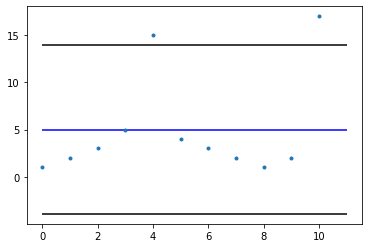

In [53]:
#x_outlier = [x_outlier for x_outlier in xx if f(x_outlier) == 1]
#x_outlier = [x_outlier for x_outlier in xx if f(x_outlier) == 1]

fac = 1.6
pyplot.plot(xx, '.')
pyplot.hlines(np.mean(xx) + fac * np.std(xx, ddof=1), 0, 11, colors='k')
pyplot.hlines(np.mean(xx),0 , 11, colors='b')
pyplot.hlines(np.mean(xx) - fac * np.std(xx, ddof=1), 0, 11, colors='k')
pyplot.show()


# Exercise 2 - Preprocessing with Python I


----

In [54]:
# helper method (nothing to do here)
def plot_Data(dataFrame, feature1="Gun ownership", feature2="Advanced degree"):
    """Plots Data. Expects dataframe and two column names for the x and y feature."""
    

    colors = {"Clinton":'blue', "Trump":'red'}
    colors = {0:'blue', 1:'red'}
    fig, ax = pyplot.subplots()
    grouped = dataFrame.groupby('Vote')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=feature1, y=feature2, label=key, color=colors[key])
    pyplot.show()

---

In [55]:
# load Dataset into pandas DataFrame
usStatesFrame = pd.read_csv("usStatesData.csv")

In [57]:
usStatesFrame

,State,Population,Population per House seat,Density (Pop. / km2),Land area (km2),Gun ownership,High school graduate,Bachelor's degree,Advanced degree,Vote
0,California,39536653,745974,97.0,403932.8,20.1%,79.8%,31.4%,11.6%,Clinton
1,Texas,28304596,786238,40.0,676587.8,35.7%,87.9%,32.3%,12.4%,Trump
2,Florida,20984400,777200,145.0,138888.1,32.5%,86.9%,27.3%,9.8%,Trump
3,New York,19849399,735163,162.0,122055.8,10.3%,85.6%,34.2%,14.8%,Clinton
4,Pennsylvania,12805537,711419,110.0,115883.8,27.1%,89.2%,28.6%,11.2%,Trump
5,Illinois,12802023,711224,89.0,143793.5,26.2%,81.9%,27.6%,9.4%,Clinton
6,Ohio,11658609,728663,109.0,105829.5,19.6%,89.1%,26.1%,9.7%,Trump
7,Georgia,10429379,744956,68.0,148958.0,31.6%,85.4%,28.8%,10.7%,Trump
8,North Carolina,10273419,790263,79.0,125919.8,28.7%,85.8%,28.4%,9.9%,Trump
9,Michigan,9962311,711594,67.0,146435.3,28.8%,89.6%,26.9%,10.5%,Trump


In [56]:
g = usStatesFrame.groupby('Vote')
for key, group in g:
    print(key)

Clinton
Clinton (at-large)
Trump
Trump (at-large, NE-01, NE-03)


In [58]:
usStatesFrame

,State,Population,Population per House seat,Density (Pop. / km2),Land area (km2),Gun ownership,High school graduate,Bachelor's degree,Advanced degree,Vote
0,California,39536653,745974,97.0,403932.8,20.1%,79.8%,31.4%,11.6%,Clinton
1,Texas,28304596,786238,40.0,676587.8,35.7%,87.9%,32.3%,12.4%,Trump
2,Florida,20984400,777200,145.0,138888.1,32.5%,86.9%,27.3%,9.8%,Trump
3,New York,19849399,735163,162.0,122055.8,10.3%,85.6%,34.2%,14.8%,Clinton
4,Pennsylvania,12805537,711419,110.0,115883.8,27.1%,89.2%,28.6%,11.2%,Trump
5,Illinois,12802023,711224,89.0,143793.5,26.2%,81.9%,27.6%,9.4%,Clinton
6,Ohio,11658609,728663,109.0,105829.5,19.6%,89.1%,26.1%,9.7%,Trump
7,Georgia,10429379,744956,68.0,148958.0,31.6%,85.4%,28.8%,10.7%,Trump
8,North Carolina,10273419,790263,79.0,125919.8,28.7%,85.8%,28.4%,9.9%,Trump
9,Michigan,9962311,711594,67.0,146435.3,28.8%,89.6%,26.9%,10.5%,Trump


In [59]:
# deal with missing values
cleanFrame = usStatesFrame.dropna()
cleanFrame = cleanFrame.reset_index(drop=True)

In [ ]:
cleanFrame

In [60]:
# replace missing values with 0
cleanFrame = cleanFrame.replace({"Population per House seat": {"—" : 0}})

# replace percent sign with "" epmty string
for column in cleanFrame.columns[5:9]:
    cleanFrame[column] = cleanFrame[column].str.replace('%','').apply(pd.to_numeric)/100

# change all values of numeric columns to numeric values
columns = cleanFrame.columns[1:5]
cleanFrame[columns] = cleanFrame[columns].apply(pd.to_numeric)

# use only binary Clinton/Trump indicators 
cleanFrame["Vote"] = [0 if "Clinton" in vote else 1 for vote in cleanFrame["Vote"]]

cleanFrame

,State,Population,Population per House seat,Density (Pop. / km2),Land area (km2),Gun ownership,High school graduate,Bachelor's degree,Advanced degree,Vote
0,California,39536653,745974,97.0,403932.8,0.201,0.798,0.314,0.116,0
1,Texas,28304596,786238,40.0,676587.8,0.357,0.879,0.323,0.124,1
2,Florida,20984400,777200,145.0,138888.1,0.325,0.869,0.273,0.098,1
3,New York,19849399,735163,162.0,122055.8,0.103,0.856,0.342,0.148,0
4,Pennsylvania,12805537,711419,110.0,115883.8,0.271,0.892,0.286,0.112,1
5,Illinois,12802023,711224,89.0,143793.5,0.262,0.819,0.276,0.094,0
6,Ohio,11658609,728663,109.0,105829.5,0.196,0.891,0.261,0.097,1
7,Georgia,10429379,744956,68.0,148958.0,0.316,0.854,0.288,0.107,1
8,North Carolina,10273419,790263,79.0,125919.8,0.287,0.858,0.284,0.099,1
9,Michigan,9962311,711594,67.0,146435.3,0.288,0.896,0.269,0.105,1


In [61]:
cleanFrame.to_csv("usStatesData2.csv")

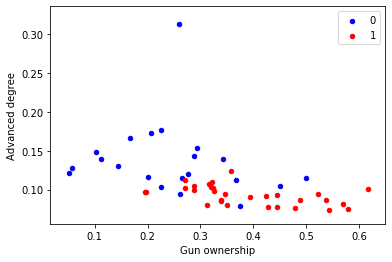

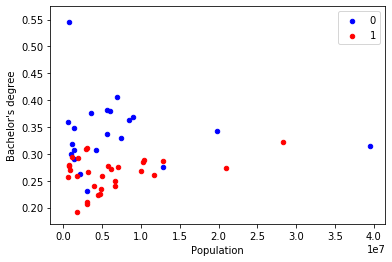

In [63]:
plot_Data(cleanFrame)
plot_Data(cleanFrame, "Population", "Bachelor's degree")

In [64]:
# Florida vs Georgia?
print(np.linalg.norm(cleanFrame.loc[2][1:9]-cleanFrame.loc[7][1:9]))

# Florida vs New York?
print(np.linalg.norm(cleanFrame.loc[2][1:9]-cleanFrame.loc[3][1:9]))

10555075.053963
1135903.9158231416


-----

# Preprocessesing Step 2: Transformation

### Transform the data

In [65]:
# Transform the data

# Chose the columns that are to be transformed
columns = cleanFrame.columns.drop(["State","Vote"])
dataMatrix = cleanFrame.as_matrix(columns=columns)

# use sklearns Min-max scaler and standardizer
scaler = preprocessing.MinMaxScaler()
scaledData = scaler.fit_transform(dataMatrix)

standardScaler = preprocessing.StandardScaler()
standardizedData = standardScaler.fit_transform(dataMatrix)

# create a new dataframe with scaled data / standardized data
scaledFrame = pd.DataFrame(scaledData, columns=columns)
scaledFrame["State"] = cleanFrame["State"]
scaledFrame["Vote"] = cleanFrame["Vote"]

standardFrame = pd.DataFrame(standardizedData, columns=columns)
standardFrame["State"] = cleanFrame["State"]
standardFrame["Vote"] = cleanFrame["Vote"]

scaledFrame

C:\Users\sreichhuber\Anaconda3\envs\ITS\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


,Population,Population per House seat,Density (Pop. / km2),Land area (km2),Gun ownership,High school graduate,Bachelor's degree,Advanced degree,State,Vote
0,1.000000,0.710118,0.022818,0.273228,0.263717,0.000000,0.344633,0.175732,California,0
1,0.711683,0.748447,0.009410,0.457729,0.539823,0.623077,0.370056,0.209205,Texas,1
2,0.523780,0.739843,0.034110,0.093876,0.483186,0.546154,0.228814,0.100418,Florida,1
3,0.494646,0.699827,0.038109,0.082486,0.090265,0.446154,0.423729,0.309623,New York,0
4,0.313836,0.677224,0.025876,0.078310,0.387611,0.723077,0.265537,0.158996,Pennsylvania,1
5,0.313746,0.677038,0.020936,0.097196,0.371681,0.161538,0.237288,0.083682,Illinois,0
6,0.284396,0.693639,0.025641,0.071506,0.254867,0.715385,0.194915,0.096234,Ohio,1
7,0.252842,0.709149,0.015996,0.100690,0.467257,0.430769,0.271186,0.138075,Georgia,1
8,0.248839,0.752278,0.018584,0.085101,0.415929,0.461538,0.259887,0.104603,North Carolina,1
9,0.240853,0.677391,0.015761,0.098983,0.417699,0.753846,0.217514,0.129707,Michigan,1


In [ ]:
standardFrame

In [66]:
# Florida vs Georgia?
print(np.linalg.norm(standardFrame.loc[2][0:8]-standardFrame.loc[7][0:8]))

# Florida vs New York?
print(np.linalg.norm(standardFrame.loc[2][0:8]-standardFrame.loc[3][0:8]))

1.598723968779379
2.474729161224811


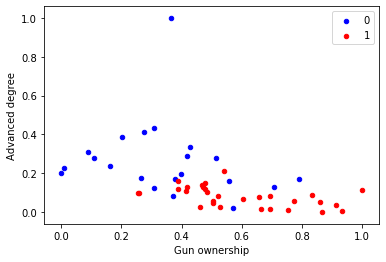

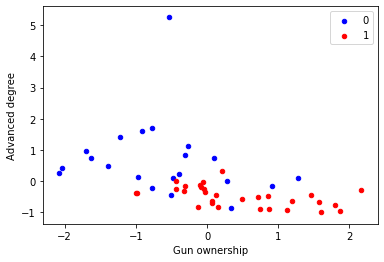

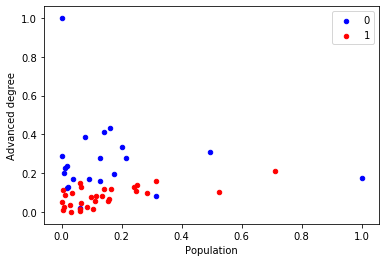

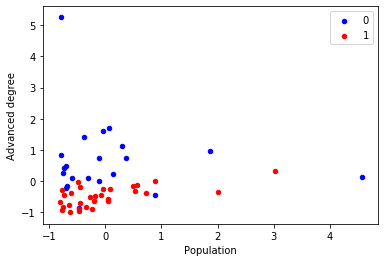

In [67]:
plot_Data(scaledFrame)
plot_Data(standardFrame)

plot_Data(scaledFrame, "Population", "Advanced degree")
plot_Data(standardFrame, "Population", "Advanced degree")

----

# Stock market values of the Dow Jones Composite Average Index. 

 

In [72]:
# load csv data into dataframe
dowJonesIndex = pd.read_csv("DJCA.csv", index_col=0, header=0)

In [73]:
dowJonesIndex

,VALUE
DATE,
2008-04-28,4464.93
2008-04-29,4465.23
2008-04-30,4451.22
2008-05-01,4543.16
2008-05-02,4551.96
...,...
2018-04-23,8206.17
2018-04-24,8082.70
2018-04-25,8117.01


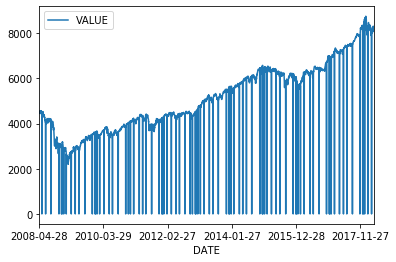

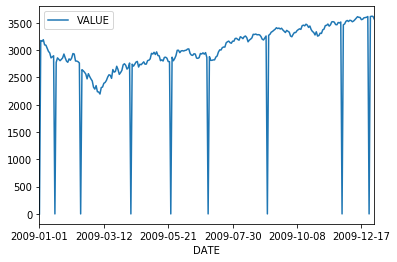

In [74]:
# plot time series
dowJonesIndex.plot(y="VALUE", use_index=True, kind="line")
dowJonesIndex.loc["2009-01-01":"2009-12-31"].plot(y="VALUE", use_index=True, kind="line")
pyplot.show()

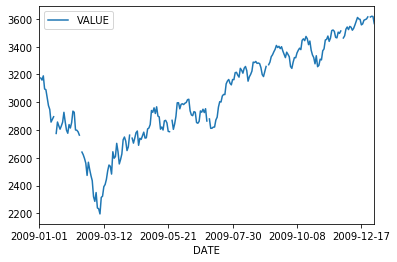

In [75]:
# time-series with missing values
dowJonesIndex_missingVales = dowJonesIndex.replace(0, np.nan)
dowJonesIndex_missingVales.loc["2009-01-01":"2009-12-31"].plot(y="VALUE", use_index=True, kind="line")
pyplot.show()

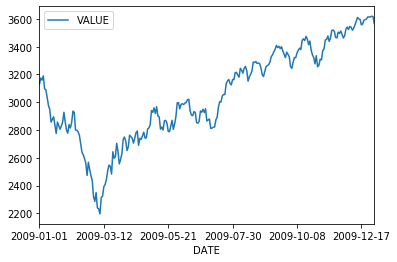

In [76]:
# deal with the missing values and plot again
# interpolate series to replace missing values


dowJonesIndex_interpolated = dowJonesIndex_missingVales.interpolate()
dowJonesIndex_interpolated.loc["2009-01-01":"2009-12-31"].plot(y="VALUE", use_index=True, kind="line")
pyplot.show()

Remove noise.

Smooth time series by means of

(a) centered

(b) tailing Moving-Average-Glättung. on various intervals (e.g. 3 days, 7 days, 30 days).

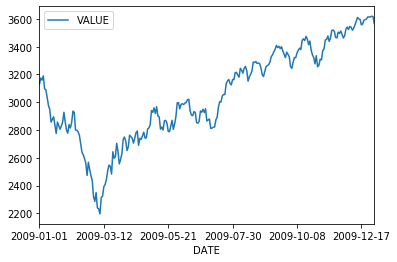

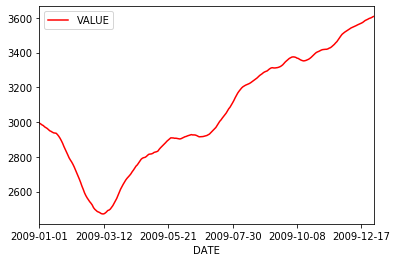

In [77]:
#centered
movingAvgFrame = dowJonesIndex_interpolated.rolling(window=30, center=True).mean()

# tailing
#movingAvgFrame = dowJonesIndex_interpolated.rolling(window=3, center=False).mean()

dowJonesIndex_interpolated.loc["2009-01-01":"2009-12-31"].plot(y="VALUE", use_index=True, kind="line")
movingAvgFrame.loc["2009-01-01":"2009-12-31"].plot(y="VALUE", use_index=True, kind="line", color="red")
pyplot.show()

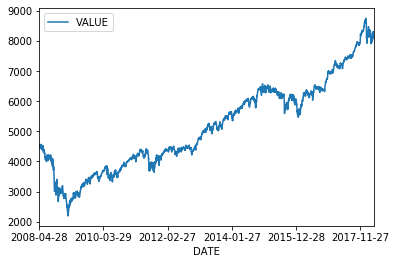

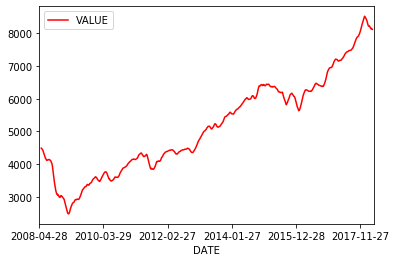

In [78]:
#centered
movingAvgFrame = dowJonesIndex_interpolated.rolling(window=30, center=True).mean()

dowJonesIndex_interpolated.plot(y="VALUE", use_index=True, kind="line")
movingAvgFrame.plot(y="VALUE", use_index=True, kind="line", color="red")
pyplot.show()